In [112]:
import fpmodules as fp
import matplotlib.pyplot as plt

In [113]:
fp.get_session(sessionid=686)

,SessionId,StartTimeId,StartDateId,EndTimeId,EndDateId,UnitId,SubjectCompositionId,Name,SubscriptionId,MacAddress
0,686,151747,20210330,92009,20210419,18,149,Apis mellifera - Labelled - Taastrup transp.,15,dca6327d8fa8


In [114]:
data, times, ds = fp.get_raw_data('dca6327d8fa8', dateid=20210330, starttimeid=81130, endtimeid=81300, ds=1)
print('length', len(data[0]))

Some files exist, not downloading again.
100% complete      [==================================================]

Reading dca6327d8fa8_20210330_raw_20210330T080228Z.raw.gz 1 of 1
length 1658291


In [ ]:
times

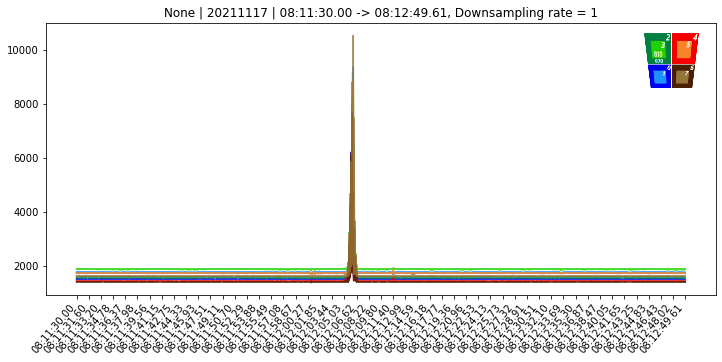

In [115]:
plt.figure(figsize=(12,5))
ax = fp.plot_raw_data(data=data, times=times, ds=ds, ax=plt.gca())
plt.show()

In [116]:
event = fp.Event(35375189).fill()

In [117]:
event.info

Id                            35375189
DateId                        20210330
TimeId                           81205
MeasurementCode       2377c41d04577c00
SessionId                          608
SerialNumber              dca6327d8fa8
Name                                20
Datetime           2021-03-30 08:12:05
Name: 0, dtype: object

In [118]:
meas = fp.dbquery('select * from measurement where unitid=18 and dateid=20210330 and timeid > 81100 and timeid < 81300')

In [119]:
fp.Event()

Event | Measurement ID = None

In [120]:
meas

,Id,TimeId,DateId,MeasurementCode,UnitId,SessionId
0,35375348,81205,20210330,5b981b18208ffc00,18,608
1,35375312,81206,20210330,58ab09a17aa81400,18,608
2,35375313,81211,20210330,337f99d32e264200,18,608
3,35375314,81211,20210330,61809fff2c44f400,18,608
4,35375188,81205,20210330,208215026effee00,18,608
5,35375189,81205,20210330,2377c41d04577c00,18,608


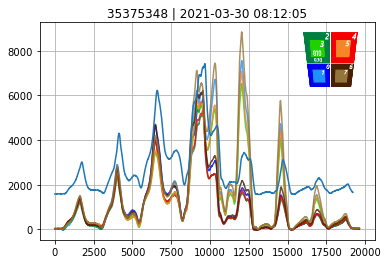

In [121]:
fp.Event(35375348).fill().plot()
plt.plot(data[0,741800:761000])
plt.show()

In [130]:
fp.Event(35375348).fill().info

Id                            35375348
DateId                        20210330
TimeId                           81205
MeasurementCode       5b981b18208ffc00
SessionId                          608
SerialNumber              dca6327d8fa8
Name                                20
Datetime           2021-03-30 08:12:05
Name: 0, dtype: object

In [128]:
pd.Timestamp(times[741800], unit="s", tz='UTC')

Timestamp('2021-03-30 08:12:05.620940685+0000', tz='UTC')

In [122]:
len(data[0,741800:761000])

19200

In [123]:
ev = fp.Event(35375348).fill()

In [124]:
len(ev.data[0])

19623

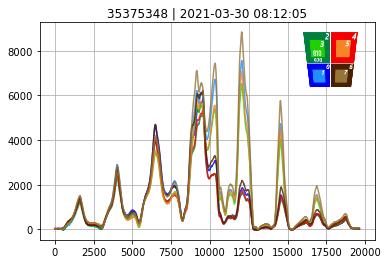

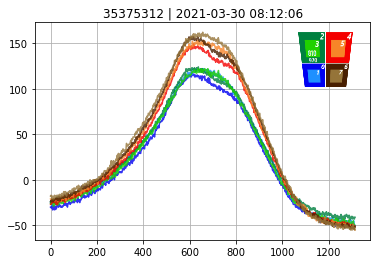

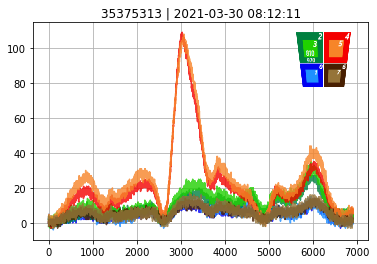

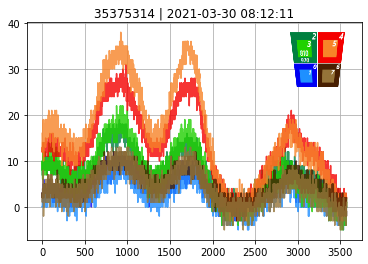

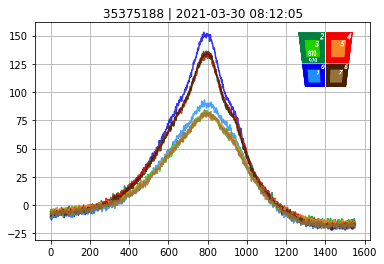

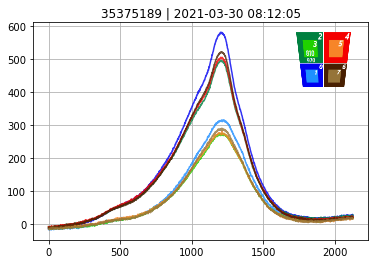

In [125]:
for m_id in meas['Id'].tolist():
    fp.Event(m_id).fill().plot()
    plt.show()